In [1]:
#importing packages
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#importing our dataset
df=pd.read_csv('Real estate.csv')
#viewing the dataFrame
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#info about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
#checking correlation
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [5]:
#to check null values
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05,random_state = 0)

In [7]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [8]:
reg.coef_

array([-3.28281240e-03,  5.18980590e+00, -2.70389960e-01, -4.34076666e-03,
        1.16918512e+00,  2.26156387e+02, -5.63794054e+00])

In [9]:
reg.intercept_

-15366.304303623541

In [10]:
y_pred = reg.predict(X_test)
y_pred

array([39.09184855, 12.82614768, 41.76173828, 12.09424855, 41.68156196,
       39.36666405, 40.57898977, 33.8846898 , 50.05358688, 45.550874  ,
       45.51385485, 40.95300388, 38.33135922, 39.89670897, 46.59039145,
       38.21070994, 39.78636257, 40.74697578, 41.30341084, 42.31380145,
       49.36104125])

In [11]:
print('r2 Score : ', r2_score(y_test, y_pred))

r2 Score :  0.7065810721724484


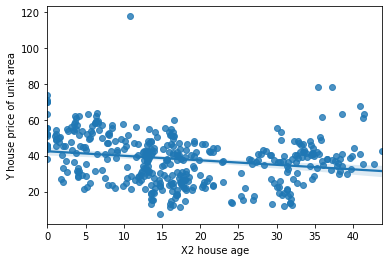

In [12]:
sns.regplot(x="X2 house age", y="Y house price of unit area", data=df);

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

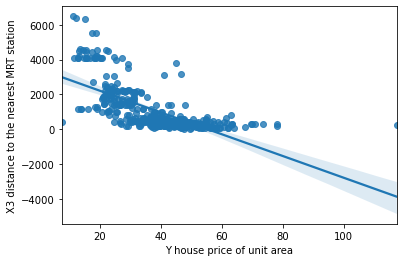

In [13]:
sns.regplot(y="X3 distance to the nearest MRT station", x="Y house price of unit area", data=df)

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

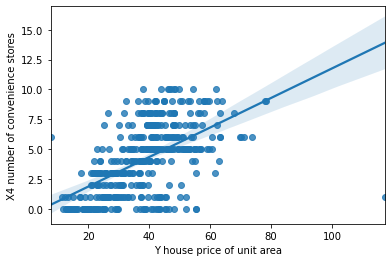

In [14]:
sns.regplot(y="X4 number of convenience stores", x="Y house price of unit area", data=df)